# 2

In [2]:
import numpy as np
import cvxpy as cp

def main():
    np.set_printoptions(precision=2, suppress=True)
    b = np.array([400, 80, 400, 200, 400, 400, 80, 400, 100, 500])
    v = np.array([500, 100, 500, 200, 700, 300, 120, 300, 150, 600])
    n = 10
    L = 4
    rho_l = 0.2
    rho_s = 0.3
    rates = (v - b) / v
    C = 2300

    s = cp.Variable(n)
    g = cp.multiply(s, rates)
    N_l = cp.sum(g[:L])
    N_s = cp.sum(g[L:])
    constraints = [
            s >= 0,
            s <= v,
            cp.sum(s) == C,
            N_l <= 0,
            N_s <= 0,
            ]
    obj = cp.Minimize(0)
    problem = cp.Problem(obj, constraints)
    problem.solve()
    if problem.status != 'infeasible':
        print(f"optimal value: {problem.value}")
        print(f"optimal s: {s.value}")
        return
    li = []
    #i = 0: N_l <= 0
    for i in range(2):
        constraints = [
                s >= 0,
                s <= v,
                cp.sum(s) == C,
                (N_l if i == 0 else N_s) <= 0,
                ]
        rho = rho_s if i == 0 else rho_l
        obj = cp.Minimize(rho_s * cp.pos(N_s + N_l))
        problem = cp.Problem(obj, constraints)
        problem.solve()
        if problem.status == 'optimal':
            li.append((problem.status, problem.value, s.value, i))

    i = 2
    constraints = [
            s >= 0,
            s <= v,
            cp.sum(s) == C,
            N_l >= 0,
            N_s >= 0,
            ]
    obj = cp.Minimize(rho_s * N_s + rho_l * N_l)
    problem = cp.Problem(obj, constraints)
    problem.solve()
    if problem.status == 'optimal':
        li.append((problem.status, problem.value, s.value, i))
    li.sort(key=lambda x: x[1])
    best_value = li[0][1]
    best_s = li[0][2]
    print(f"best value: {best_value:.4f}")
    print(f"best s: {best_s}")
    print(f"N_s = {N_s.value:.4f}, N_l={N_l.value:.4f}")
    print(li[0][1], li[0][-1])
    print(li[1][1], li[1][-1])
    print(li[2][1], li[2][-1])
    dumb_s = C / np.sum(v) * v
    g = dumb_s * rates
    n_l = np.sum(g[:L])
    n_s = np.sum(g[L:])
    print(f"n_s: {n_s:.4f}, n_l: {n_l:.4f}")
    #we know it's positive
    print(f"Dumb cost = {rho_s * n_s + rho_l * n_l :.4f}")

main()


best value: 24.0000
best s: [413.21  73.58 413.21 200.     0.   300.     0.   300.     0.   600.  ]
N_s = 0.0000, N_l=121.3333
24.000000013763028 1
24.266666684548067 2
78.00000001564204 0
n_s: 192.2190, n_l: 145.8213
Dumb cost = 86.8300


# 5

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from data.storage_tradeoff_data import T, t, p, u
p = p.reshape(T)
u = u.reshape(T)

def solve(Q, C, D):
    q1 = cp.Variable(1)
    c = cp.Variable(T)
    q = cp.hstack([q1, cp.cumsum(c)[:-1]])

    constraints = [
            q <= Q,
            q >= 0,
            c <= C,
            c >= -D,
            q[-1] + c[-1] == q[0],
            u + c >= 0,
            ]

    obj = cp.Minimize(p @ (u + c))
    problem = cp.Problem(obj, constraints)
    problem.solve()
    return q.value, c.value, problem.value

def kplot(t, p, u, q, c):
    plt.plot(t, p, 'g')
    plt.plot(t, u, 'r')
    plt.plot(t, q, 'b')
    plt.plot(t, c, 'y')
    plt.show()

def partb():
    Q = 35
    C = 3
    D = 3
    q, c, _ = solve(Q, D, C)
    kplot(t, p, u, q, c)

def partc():
    n = 150
#    Qs = np.linspace(0, 150, n)
    Qs = np.arange(n)
    for i, cd_limit in enumerate([1, 3]):
        C = cd_limit
        D = cd_limit
        cost = np.vectorize(lambda Q: solve(Q, C, D)[-1])(Qs)
        color = 'r' if i == 0 else 'g'
        plt.plot(Qs, cost, color)
#         plt.axvline(x=T/2 * cd_limit, color=color, linestyle='--')
    plt.show()

## Part b: 

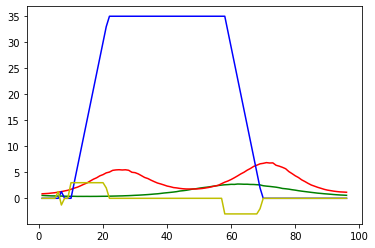

In [4]:
partb()

## Part c:

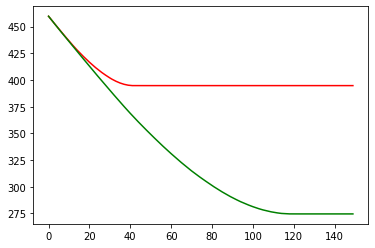

Total time: 10.643439054489136


In [5]:
import time
t0 = time.time()
partc()
t1 = time.time()
total_time = t1 - t0
print(f"Total time: {total_time}")

## The interpertation is in the pdf file